In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

sc.settings.verbosity = 3

In [2]:
adata = sc.read_h5ad('../../processed_data/CDSDB_mdmt_613.h5ad')
adata

AnnData object with n_obs × n_vars = 613 × 978
    obs: 'Sample ID', 'Base/Post', 'CDS-DB patient signature list', 'CDS-DB dataset list', 'Patient ID', 'Sampling location', 'Sampling time', 'Annotation of the therapeutic regimen from the data source', 'Therapeutic Regimen Recorded In The Data Source', 'Therapeutic regimen', 'Therapeutic regimen ID', 'Administration dose', 'Additional information about the therapeutic regimen', 'Drug category', 'Source dataset', 'Source database', 'Reference (PubMed ID)', 'Data type', 'Platform', 'Cancer subtype recorded in the data source', 'Cancer subtype', 'DOID of cancer subtype', 'Sampling location category', 'Additional information about the cancer', 'Original response status', 'Response group', 'Pediatric oncology', 'Predefined grouping criteria of response and non-response groups', 'Drug category_compact', 'sample_id_unique', 'pair_match_id', 'pert_time', 'pert_time_idx', 'pert_dose', 'pert_dose_unit', 'pert_dose_idx', 'pert_id', 'pert_idx', 'ti

In [3]:
adata.obs['Cancer subtype'].value_counts()

Cancer subtype
Breast cancer                                    289
Chronic myeloid leukemia                          72
Childhood B-cell acute lymphoblastic leukemia     63
Estrogen-receptor positive breast cancer          38
Chronic lymphocytic leukemia                      31
Ovarian cancer                                    27
Gastrointestinal stromal tumor                    18
Childhood T-cell acute lymphoblastic leukemia     16
Acute myeloid leukemia                            14
Invasive ductal carcinoma                         12
Invasive lobular carcinoma                        11
Melanoma                                           9
Her2-receptor negative breast cancer               7
Alveolar soft part sarcoma                         6
Name: count, dtype: int64

In [4]:
# match cancer subtype with L1000_tissues
cancer2tissue_dict = {
    'Breast cancer':'breast',
    'Her2-receptor negative breast cancer':'breast',
    'Estrogen-receptor positive breast cancer':'breast',
    "Invasive ductal carcinoma":"breast",
    "Invasive lobular carcinoma":"breast", 
    'Chronic myeloid leukemia':'haematopoietic_and_lymphoid_tissue',
    'Chronic lymphocytic leukemia':'haematopoietic_and_lymphoid_tissue',
    'Childhood B-cell acute lymphoblastic leukemia':'haematopoietic_and_lymphoid_tissue',
    'Childhood T-cell acute lymphoblastic leukemia':'haematopoietic_and_lymphoid_tissue',
    'Acute myeloid leukemia':'haematopoietic_and_lymphoid_tissue',
    "Ovarian cancer":"ovary",
    "Gastrointestinal stromal tumor":"stomach",
    "Melanoma":"skin",
    "Alveolar soft part sarcoma":"soft_tissue"
}

In [5]:
# match cancer subtype with cancer types
cancer2cancer_dict = {
    'Breast cancer':'Breast cancer',
    'Her2-receptor negative breast cancer':'Breast cancer',
    'Estrogen-receptor positive breast cancer':'Breast cancer',
    "Invasive ductal carcinoma":"Breast cancer",
    "Invasive lobular carcinoma":"Breast cancer", 
    'Chronic myeloid leukemia':'leukemia',
    'Chronic lymphocytic leukemia':'leukemia',
    'Childhood B-cell acute lymphoblastic leukemia':'leukemia',
    'Childhood T-cell acute lymphoblastic leukemia':'leukemia',
    'Acute myeloid leukemia':'leukemia',
    "Ovarian cancer":"Ovarian cancer",
    "Gastrointestinal stromal tumor":"Gastric cancer",
    "Melanoma":"Melanoma",
    "Alveolar soft part sarcoma":"Alveolar soft part sarcoma"
}

In [6]:
adata.obs["tissue"] = adata.obs["Cancer subtype"].map(cancer2tissue_dict)
adata.obs["Cancer_type"] = adata.obs["Cancer subtype"].map(cancer2cancer_dict)
adata.obs["Cancer_type"].value_counts()

Cancer_type
Breast cancer                 357
leukemia                      196
Ovarian cancer                 27
Gastric cancer                 18
Melanoma                        9
Alveolar soft part sarcoma      6
Name: count, dtype: int64

# generate pie_df

In [7]:
pie_df = pd.DataFrame.from_dict(cancer2cancer_dict, orient='index', columns=["cancer_type"])
pie_df['counts'] = pie_df.index.map(dict(adata.obs['Cancer subtype'].value_counts()))
pie_df["cancer_subtype"] = pie_df.index
pie_df['tissue'] = pie_df["cancer_subtype"].map(cancer2tissue_dict)
pie_df.reset_index(drop=True, inplace=True)

pie_df = pie_df.sort_values(by=['cancer_subtype', 'counts'], ascending=[True, False])
pie_df

,cancer_type,counts,cancer_subtype,tissue
9,leukemia,14,Acute myeloid leukemia,haematopoietic_and_lymphoid_tissue
13,Alveolar soft part sarcoma,6,Alveolar soft part sarcoma,soft_tissue
0,Breast cancer,289,Breast cancer,breast
7,leukemia,63,Childhood B-cell acute lymphoblastic leukemia,haematopoietic_and_lymphoid_tissue
8,leukemia,16,Childhood T-cell acute lymphoblastic leukemia,haematopoietic_and_lymphoid_tissue
6,leukemia,31,Chronic lymphocytic leukemia,haematopoietic_and_lymphoid_tissue
5,leukemia,72,Chronic myeloid leukemia,haematopoietic_and_lymphoid_tissue
2,Breast cancer,38,Estrogen-receptor positive breast cancer,breast
11,Gastric cancer,18,Gastrointestinal stromal tumor,stomach
1,Breast cancer,7,Her2-receptor negative breast cancer,breast


In [8]:
pie_df_grouped = pie_df.groupby("cancer_type").sum()
pie_df_grouped = pie_df_grouped.sort_values(by=['counts'], ascending=[False])
pie_df_grouped

,counts,cancer_subtype,tissue
cancer_type,,,
Breast cancer,357,Breast cancerEstrogen-receptor positive breast...,breastbreastbreastbreastbreast
leukemia,196,Acute myeloid leukemiaChildhood B-cell acute l...,haematopoietic_and_lymphoid_tissuehaematopoiet...
Ovarian cancer,27,Ovarian cancer,ovary
Gastric cancer,18,Gastrointestinal stromal tumor,stomach
Melanoma,9,Melanoma,skin
Alveolar soft part sarcoma,6,Alveolar soft part sarcoma,soft_tissue


In [9]:
custom_colors = [
    '#ECC50F',  # Breast cancer
    '#EDCF40',  # Her2-receptor negative breast cancer
    '#F5E182',  # Estrogen-receptor positive breast cancer
    '#F8E89E',  # Invasive ductal carcinoma
    '#FBF1C5',  # Invasive lobular carcinoma
    '#3074E4',  # Chronic myeloid leukemia
    '#5990EA',  # Chronic lymphocytic leukemia
    '#7DA8EE',  # Childhood B-cell acute lymphoblastic leukemia
    '#A7C4F4',  # Childhood T-cell acute lymphoblastic leukemia
    '#D2E0FA',  # Acute myeloid leukemia
    '#B691BE',  # Ovarian cancer
    '#CCCCFF',  # Gastrointestinal stromal tumor
    '#D1D257',  # Melanoma
    '#C69E32'   # Alveolar soft part sarcoma
]

tissue_colors = [
    '#ECC50F',  # Breast cancer
    '#A7C4F4',  # Acute myeloid leukemia
    '#B691BE',  # Ovarian cancer
    '#CCCCFF',  # Gastrointestinal stromal tumor
    '#D1D257',  # Melanoma
    '#C69E32'   # Alveolar soft part sarcoma
]

# pie chart

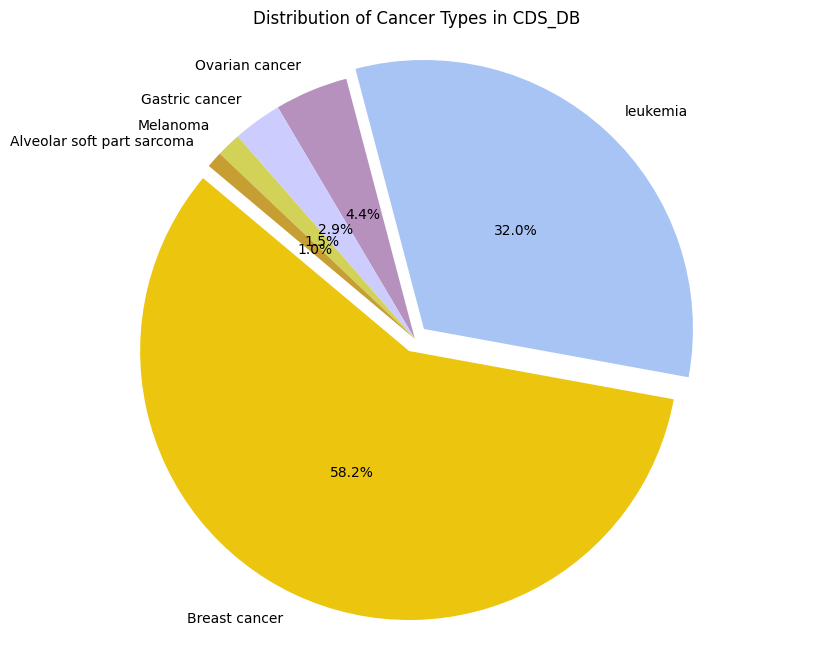

In [10]:
explode = [0.05, 0.05, 0, 0, 0, 0]

plt.figure(figsize=(10, 8))
plt.pie(pie_df_grouped['counts'], labels=pie_df_grouped.index, colors=tissue_colors, 
        autopct='%1.1f%%', 
        explode= explode,
        pctdistance=0.5,
        startangle=140)
plt.title('Distribution of Cancer Types in CDS_DB')
plt.axis('equal')

# plt.savefig("figs/pie.svg", format="svg", dpi=300, bbox_inches="tight")

plt.show()

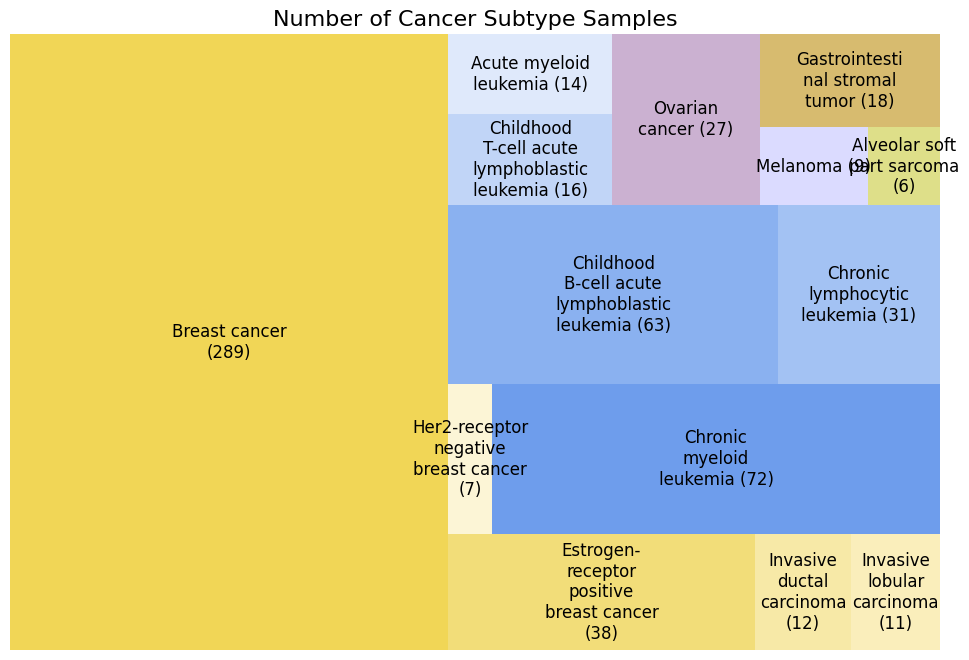

In [11]:
import textwrap 


df_sorted = pie_df.sort_values(by=['tissue', 'counts'], ascending=[True, False])
df = df_sorted

sizes = df['counts']
labels = df.apply(lambda x: f"{x['cancer_subtype']}\n({x['counts']})", axis=1) 

def wrap_text(text, width=13):
    return '\n'.join(textwrap.wrap(text, width))

wrapped_labels = [wrap_text(label) for label in labels]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=wrapped_labels, color=custom_colors, alpha=0.7, 
              text_kwargs={'fontsize': 12})
plt.axis('off')
plt.title('Number of Cancer Subtype Samples', fontsize=16)
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), fontsize=12, frameon=False, ncol=3)

# plt.savefig("figs/pie_chart.svg", format="svg", dpi=300, bbox_inches="tight")

plt.show()